# Import Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif,VarianceThreshold,RFE,chi2,SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTENC,SMOTE
from xgboost import XGBClassifier
from mlxtend.evaluate import bias_variance_decomp
import gensim
from gensim.models import Word2Vec,KeyedVectors
from sklearn.naive_bayes import GaussianNB
import re
import nltk
from nltk.corpus import stopwords
import emoji
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Load Dataset

In [71]:
temp_df = pd.read_csv('IMDB Dataset.csv')
df = temp_df.iloc[:10000]
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# EDA

### Duplicate Value Detection

In [3]:
duplicate=df.duplicated().sum()
duplicate[duplicate>0]

array([103], dtype=int64)

### Analysis

<AxesSubplot:ylabel='sentiment'>

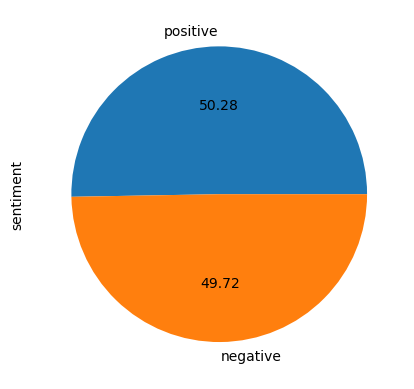

In [51]:
df['sentiment'].value_counts().plot.pie(autopct='%.2f')

### Preprocessing

In [52]:
def remove_tags(text):
    x=re.compile("<.*?>")
    clean=x.sub('',text)
    return clean

In [72]:
df['review']=df['review'].apply(remove_tags)
df.review.head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. The filming tec...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [73]:
df['review']=df['review'].apply(lambda x:x.lower())
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [55]:
def remove_puncs(text):
    x=re.compile(r'[^\w\s]')
    clean=x.sub('',text)
    return clean

In [74]:
df['review']=df['review'].apply(remove_puncs)
df.review.head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

In [57]:
nltk.download('stopwords')
def remove_stopwords(text):
    l=[]
    sw=stopwords.words('english')
    for w in text.split():
        if w not in sw:
            l.append(w)
    return " ".join(l)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jarvis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
df['review'] = df['review'].apply(remove_stopwords)

In [76]:
df['review'] = df['review'].apply(emoji.demojize)

# Feature Engineering

### Duplicate Value Handling

In [77]:
df.drop_duplicates(inplace=True)

### Encoding

In [78]:
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

In [79]:
X = df.iloc[:,0:1]
y = df['sentiment']

# Feature Selection

In [63]:
cv = CountVectorizer()
X = cv.fit_transform(X['review'])
X

<9983x82573 sparse matrix of type '<class 'numpy.int64'>'
	with 994730 stored elements in Compressed Sparse Row format>

# Splitting

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
X_train=X_train.toarray()
X_test=X_test.toarray()

# Model Training and Evaluation

In [66]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_test_pred_gnb = gnb.predict(X_test)
y_test_pred_gnb

array([0, 0, 0, ..., 1, 0, 0])

In [67]:
print("Mean squared error: ",mean_squared_error(y_test,y_test_pred_gnb))
print("Root mean squared error: ",mean_squared_error(y_test,y_test_pred_gnb)**(0.5))
print("Accuracy for test set: ",accuracy_score(y_test,y_test_pred_gnb))
print("Precision for test set: ",precision_score(y_test,y_test_pred_gnb))
print("Recall for test set: ",recall_score(y_test,y_test_pred_gnb))
print("F1 score for test set: ",f1_score(y_test,y_test_pred_gnb))
print("Confusion matrix: ",confusion_matrix(y_test,y_test_pred_gnb))

Mean squared error:  0.37305958938407613
Root mean squared error:  0.6107860422308913
Accuracy for test set:  0.6269404106159239
Precision for test set:  0.6498316498316499
Recall for test set:  0.5721343873517787
F1 score for test set:  0.6085128744088283
Confusion matrix:  [[673 312]
 [433 579]]


In [68]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_test_pred_rf = rf.predict(X_test)
y_test_pred_rf

array([0, 0, 1, ..., 1, 0, 0])

In [69]:
print("Mean squared error: ",mean_squared_error(y_test,y_test_pred_rf))
print("Root mean squared error: ",mean_squared_error(y_test,y_test_pred_rf)**(0.5))
print("Accuracy for test set: ",accuracy_score(y_test,y_test_pred_rf))
print("Precision for test set: ",precision_score(y_test,y_test_pred_rf))
print("Recall for test set: ",recall_score(y_test,y_test_pred_rf))
print("F1 score for test set: ",f1_score(y_test,y_test_pred_rf))
print("Confusion matrix: ",confusion_matrix(y_test,y_test_pred_rf))

Mean squared error:  0.15072608913370056
Root mean squared error:  0.38823458003338723
Accuracy for test set:  0.8492739108662994
Precision for test set:  0.8544366899302094
Recall for test set:  0.8468379446640316
F1 score for test set:  0.850620347394541
Confusion matrix:  [[839 146]
 [155 857]]


In [81]:
tfidf = TfidfVectorizer()

In [82]:
X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review'])

In [84]:
gnb = GaussianNB()
gnb.fit(X_train_tfidf,y_train)
y_test_pred_gnb = gnb.predict(X_test_tfidf.toarray())
y_test_pred_gnb

array([0, 0, 0, ..., 1, 0, 0])

In [85]:
print("Mean squared error: ",mean_squared_error(y_test,y_test_pred_gnb))
print("Root mean squared error: ",mean_squared_error(y_test,y_test_pred_gnb)**(0.5))
print("Accuracy for test set: ",accuracy_score(y_test,y_test_pred_gnb))
print("Precision for test set: ",precision_score(y_test,y_test_pred_gnb))
print("Recall for test set: ",recall_score(y_test,y_test_pred_gnb))
print("F1 score for test set: ",f1_score(y_test,y_test_pred_gnb))
print("Confusion matrix: ",confusion_matrix(y_test,y_test_pred_gnb))

Mean squared error:  0.3780671006509765
Root mean squared error:  0.6148716131445462
Accuracy for test set:  0.6219328993490235
Precision for test set:  0.6278606965174129
Recall for test set:  0.6235177865612648
F1 score for test set:  0.6256817055032226
Confusion matrix:  [[611 374]
 [381 631]]


In [86]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_test_pred_rf = rf.predict(X_test_tfidf.toarray())
y_test_pred_rf

array([0, 0, 1, ..., 1, 0, 0])

In [87]:
print("Mean squared error: ",mean_squared_error(y_test,y_test_pred_rf))
print("Root mean squared error: ",mean_squared_error(y_test,y_test_pred_rf)**(0.5))
print("Accuracy for test set: ",accuracy_score(y_test,y_test_pred_rf))
print("Precision for test set: ",precision_score(y_test,y_test_pred_rf))
print("Recall for test set: ",recall_score(y_test,y_test_pred_rf))
print("F1 score for test set: ",f1_score(y_test,y_test_pred_rf))
print("Confusion matrix: ",confusion_matrix(y_test,y_test_pred_rf))

Mean squared error:  0.14822233350025038
Root mean squared error:  0.38499653699773767
Accuracy for test set:  0.8517776664997496
Precision for test set:  0.8623481781376519
Recall for test set:  0.841897233201581
F1 score for test set:  0.8520000000000001
Confusion matrix:  [[849 136]
 [160 852]]
